# The XKCD Raptor Problem
This is originally from an XKCD comic <https://xkcd.com/135/>

The problem is to figure out if a human at the center of an equilateral triangle 20 m on each side will survive if a raptor is placed at each of the vertices. One of the raptors is wounded.

In this sheet, we simulate a mathematical model of the problem that we built up in class.

* The human runs at 6.7 m/s in a straight line.
* A raptor runs at ~40 mph, or 17 m/s.
* A wounded raptor runs at about 10 m/s.
* Raptors run directly at the humans at their maximum velocity.
* We neglect the impact of acceleration.
* We assume that raptors can catch a human within a few centimeters.
* We assume there are no limits to the raptor motion in chasing the human.
* We assume the human only runs in a single angle.

The equations of motion for a human are then simple: 
$$\frac{dh(t)}{dt} = \begin{bmatrix} \cos \theta \\ \sin \theta \end{bmatrix} v_{\text{human}} $$

The raptors chase the human
$$\frac{dr(t)}{dt} = \frac{h(t) - r(t)}{\| h(t) - r(t) \|} v_{\text{raptor}}$$

Note that we will have three positions for the raptors, one for each. There will also be a special velocity for the wounded raptor.

To make the problem slightly easier, we position the raptors 20m away from the human.

In [2]:
angle=0.
vhuman=6.7
vraptor0=10. # the slow raptor velocity in m/s
vraptor=17. # 

raptor_distance = 20.

raptor_min_distance = 0.2; # a raptor within 20 cm can attack
tmax=10. # the maximum time in seconds 
nsteps=1000

"""
This function will compute the derivatives of the
positions of the human and the raptors
"""
function compute_derivatives(h,r0,r1,r2)
    dh = [cos(angle),sin(angle)]*vhuman
    dr0 = (h-r0)/norm(h-r0)*vraptor0
    dr1 = (h-r1)/norm(h-r1)*vraptor
    dr2 = (h-r2)/norm(h-r2)*vraptor
    return dh, dr0, dr1, dr2
end
"""
This function will use forward Euler to simulate the Raptors
"""
function simulate_raptors()
    # initial positions 
    h = [0.0,0.0]
    r0 = [1.0,0.0]*raptor_distance
    r1 = [-0.5,sqrt(3.)/2.]*raptor_distance
    r2 = [-0.5,-sqrt(3.)/2.]*raptor_distance
    
    # how much time el
    dt = tmax/nsteps
    t = 0.
    
    hhist = zeros(2,nsteps+1)
    r0hist = zeros(2,nsteps+1)
    r1hist = zeros(2,nsteps+2)
    r2hist = zeros(2,nsteps+2)
    
    hhist[:,1] = h
    r0hist[:,1] = r0
    r1hist[:,1] = r1
    r2hist[:,1] = r2
    
    for i=1:nsteps
        dh, dr0, dr1, dr2 = compute_derivatives(h,r0,r1,r2)
        h += dh*dt
        r0 += dr0*dt
        r1 += dr1*dt
        r2 += dr2*dt
        t += dt

        hhist[:,i+1] = h
        r0hist[:,i+1] = r0
        r1hist[:,i+1] = r1
        r2hist[:,i+1] = r2
        
        if norm(r0-h) <= raptor_min_distance ||
            norm(r1-h) <= raptor_min_distance ||
            norm(r2-h) <= raptor_min_distance
            @printf("The raptors caught the human in %f seconds\n", t)
            
            # truncate the history
            hhist = hhist[:,1:i+1]
            r0hist = r0hist[:,1:i+1]
            r1hist = r1hist[:,1:i+1]
            r2hist = r2hist[:,1:i+1]
            
            break
        end
    end
    return hhist, r0hist, r1hist, r2hist
end

angle = pi/2.
simulate_raptors();

The raptors caught the human in 0.910000 seconds


In [3]:
using Plots

The raptors caught the human in 1.240000 seconds



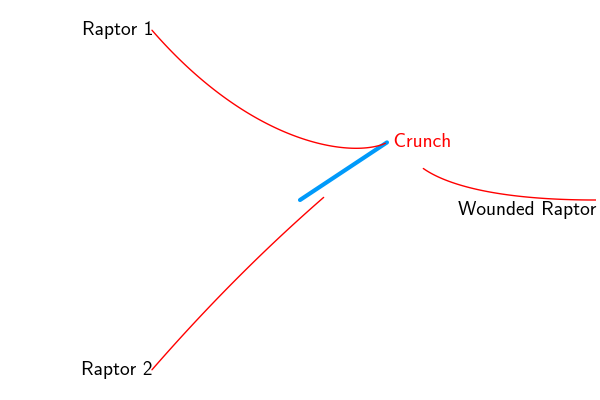

In [33]:
function show_raptors()
    hhist, r0hist, r1hist, r2hist = simulate_raptors()
    plot(vec(hhist[1,:]),vec(hhist[2,:]),linewidth=3)
    plot!(vec(r0hist[1,:]),vec(r0hist[2,:]),color=:red)
    plot!(vec(r1hist[1,:]),vec(r1hist[2,:]),color=:red)    
    plot!(vec(r2hist[1,:]),vec(r2hist[2,:]),color=:red)    
    plot!(grid=false,xticks=false,yticks=false,legend=false,border=false)
    plot!(xlim=[-20.,20.],ylim=[-20.,20.])
    annotate!(r0hist[1,1], r0hist[2,1]-1,text("Wounded Raptor",:right,"cmss10"))
    annotate!(r1hist[1,1], r1hist[2,1],text("Raptor 1",:right, "cmss10"))
    annotate!(r2hist[1,1], r2hist[2,1],text("Raptor 2",:right, "cmss10"))    
    annotate!(hhist[1,end], hhist[2,end],text(" Crunch",:left,:red, "cmss10"))    
end
angle = pi/4
show_raptors()

The raptors caught the human in 1.390000 seconds



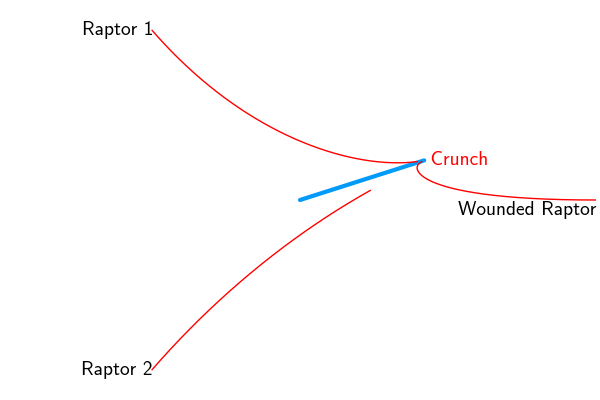

In [34]:
angle = pi/7.
show_raptors()

The raptors caught the human in 1.381000 seconds



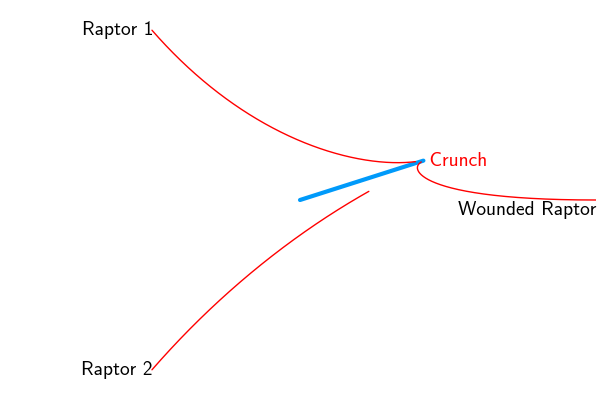

In [35]:
nsteps=10000
angle = pi/7.
show_raptors()

This is non-physical



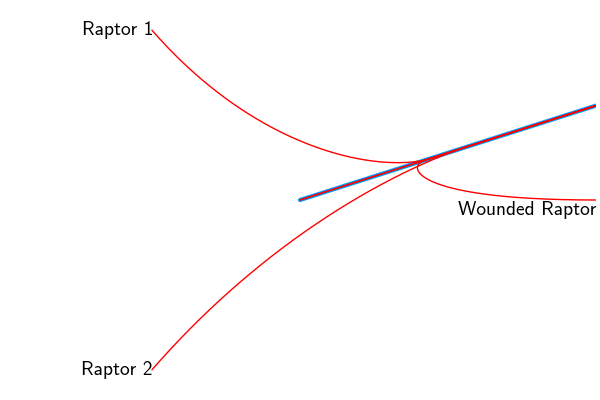

In [41]:
raptor_min_distance=0.00001
println("This is non-physical")
show_raptors()